# TP0 : Introduction à la programmation avec Python

Afin de compléter ce devoir, il vous est demander de suivre ce Jupyter Notebook.

Pour ce faire, deux options s'offrent à vous :

- Ouvrir le fichier __.ipynb__ dans [Google Colab](https://colab.research.google.com/).


- Télécharger [Python](https://www.python.org/) sur votre ordinateur. 
    - Installer les librairies de base de calcul scientifique [SciPy](https://www.scipy.org/).
    - Assurez-vous que <code>C:\Users\...\Python39 </code> et <code>C:\Users\...\Python39\Scripts</code> soit ajouté dans votre PATH. Cela vous permettra d'appeler Python et ses librairies directement depuis l'invite de commande.
    - Pour installer des librairies avec __pip__ qui viens avec Python, vous pouvez installer ces librairies en tapant la ligne suivant dans votre invite de commande : <code>python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose</code>  
    - Pour ouvrir Jupyter Notebook, ouvrez l'invite de commande et tapez <code>jupyter notebook</code>, un page web devrait alors s'ouvrir, vous permettant d'accéder à ce TP.
    

Afin de travailler efficacement en Python, il vous est également conseillé d'utiliser un environnement de développement afin d'avoir une interface graphique, comme celle présente avec MATLAB. Plusieurs IDE gratuit existe sur le web, mais nous vous recommandons particulièrement [VSCode](https://code.visualstudio.com/) ou [PyCharm](https://www.jetbrains.com/fr-fr/pycharm/). Les jupyter notebook peuvent également être accédé à partir de ces deux interfaces.

<br>

__Note__: Afin de vous simplifier la tâche, assurez-vous de cocher la
case suivante lors de l'installation de Python.

## 1. Vecteurs et fonctions

En python, la librairie [Numpy](https://numpy.org/) est utilisée pour le calcul scientifique matriciel et permet de reproduire les opérations algébriques disponibles sous Matlab.

Contrairement à Matlab, les librairies utilisées au cours du code doivent être explicitement importées au début de l'exécution du code. Une erreur à cette ligne indiquerait également que la librairie est mal installée sur votre ordinateur.

In [1]:
import numpy as np # numpy est une librairie permettant de réaliser la plupart des opérations algébriques disponibles sous matlab

__1.1__  À l'aide de la fonction [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), créez un vecteur temps $t$  de 1001 points allant de 0 à 10.

In [148]:
t_secondes = np.linspace(0,10,1001)

__1.2__ À l'aide de la fonction [np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), créez un vecteur $t$ allant de 0 à 2$\pi$ avec un pas de $\pi/20$.

In [149]:
t_radians = np.arange(0,2*np.pi,np.pi/20)


__1.3__ Créez un vecteur des signaux $g(t)=\cos(2\pi f_0 t)$ pour $f_0=2$Hz sur une durée de 10 secondes. Ne pas utiliser de boucle for.

In [150]:
f_0 = 2
g_t = np.cos(2*np.pi*f_0*t_secondes)

1.4 Créez une fonction Python qui retourne la fonction de transfert d'un filtre passe-bande 

$$ H(j\omega)=\frac{1}{1+jQ\left(x-1/x\right)} $$

avec $x=\frac{\omega}{\omega_0}$


note: le nombre complexe est défini par "1.j" avec numpy. Le prototype de la fonction vous est fourni. Ne pas utiliser de boucle for.

In [151]:
def filtre_passe_bande(Q, omega0, omega_low, omega_high):
    omega = np.linspace(omega_low,omega_high,10001) #Est-ce que la plage doit être autour de omega0?
    x = omega/omega0
    filtre = 1/(1+1.j*Q*(x-1/x))
    return omega, filtre

## 2. Graphique avec Matplotlib ##

De la même façon que Numpy permet de faire du calcul numérique, [matplotlib](https://matplotlib.org/) est utilisé afin de recréer la génération de graphique de Matlab.

In [152]:
import matplotlib.pyplot as plt # Permet de tracer des graphiques et d'afficher des images
plt.rcParams['figure.dpi'] = 100 # permet de définir la résolution


__2.1__ À l'aide la fonction [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), tracez sur un même graphe la partie réelle et la partie imaginaire du filtre défini précédemment. Assurez-vous que votre graphe respecte les normes (axes, titre, etc.). Assurez-vous que votre graphe soit lisible. 

<!-- Astuces : Consultez la liste des fonctions disponibles. -->

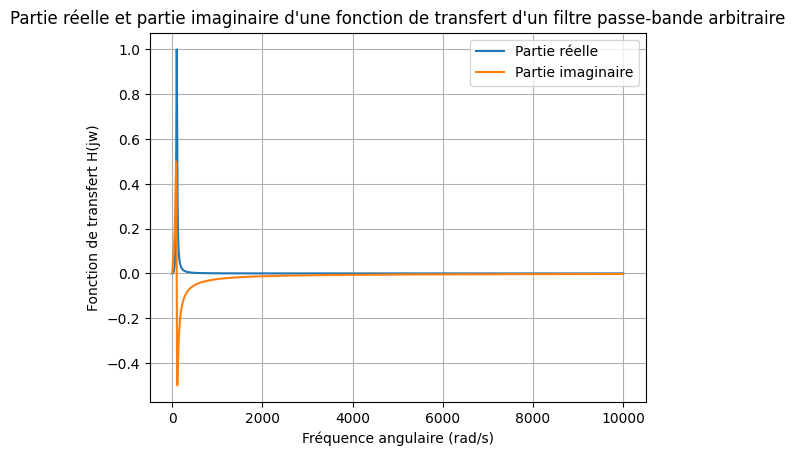

In [153]:
#Paramètres d'un filtre passe-bande arbitraire
Q_arbitraire = 4
omega0_arbitraire = 100
omega_low_arbitraire = 1
omega_high_arbitraire = 10000

#Création de la fonction et extraction de ses parties réelles et imaginaires
abscisse, filtre_arbitraire = filtre_passe_bande(Q_arbitraire,omega0_arbitraire,omega_low_arbitraire,omega_high_arbitraire)
real_filtre_arbitraire = np.real(filtre_arbitraire)
imag_filtre_arbitraire = np.imag(filtre_arbitraire)

#Affichage du graphique et de ses composantes
plt.plot(abscisse, real_filtre_arbitraire)
plt.plot(abscisse, imag_filtre_arbitraire)
plt.grid(True)
plt.xlabel("Fréquence angulaire (rad/s)")
plt.ylabel("Fonction de transfert H(jw)")
plt.title("Partie réelle et partie imaginaire d'une fonction de transfert d'un filtre passe-bande arbitraire")
plt.legend(["Partie réelle", "Partie imaginaire"])
plt.show()



__2.2__ De manière similaire à la question 2.1, tracez la réponse du filtre en échelle semilog selon l'axe y et puis selon l'axe x

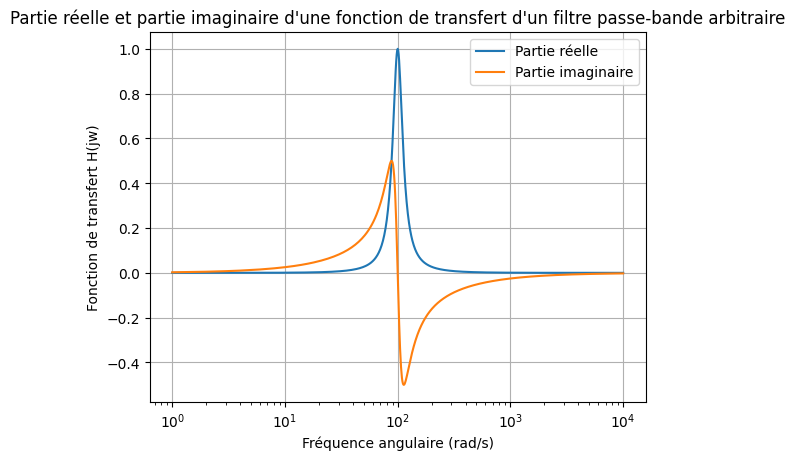

In [154]:
#Affichage du graphique et de ses composantes avec une échelle semi-log en x
plt.plot(abscisse, real_filtre_arbitraire)
plt.plot(abscisse, imag_filtre_arbitraire)
plt.semilogx()
plt.grid(True)
plt.xlabel("Fréquence angulaire (rad/s)")
plt.ylabel("Fonction de transfert H(jw)")
plt.title("Partie réelle et partie imaginaire d'une fonction de transfert d'un filtre passe-bande arbitraire")
plt.legend(["Partie réelle", "Partie imaginaire"])
plt.show()


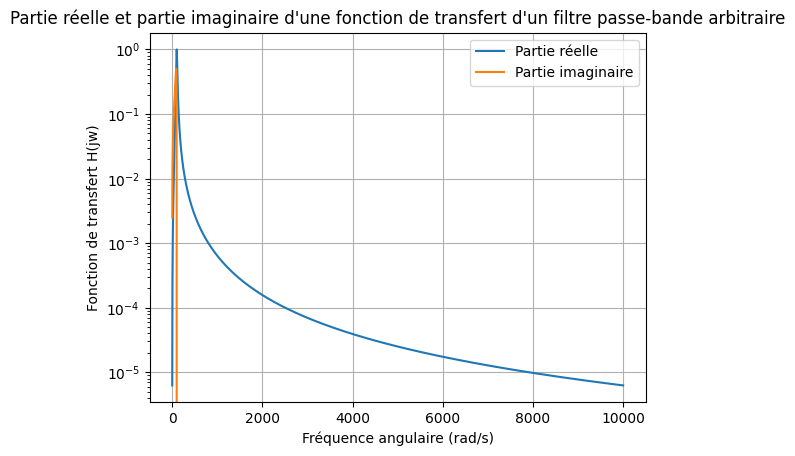

In [155]:
#Affichage du graphique et de ses composantes avec une échelle semi-log en y
plt.plot(abscisse, real_filtre_arbitraire)
plt.plot(abscisse, imag_filtre_arbitraire)
plt.semilogy()
plt.grid(True)
plt.xlabel("Fréquence angulaire (rad/s)")
plt.ylabel("Fonction de transfert H(jw)")
plt.title("Partie réelle et partie imaginaire d'une fonction de transfert d'un filtre passe-bande arbitraire")
plt.legend(["Partie réelle", "Partie imaginaire"])
plt.show()



__2.3__ Avec la fonction [subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot), tracez les diagrammes de Bode du filtre (amplitude et phase) en deux graphiques côtes à côtes.

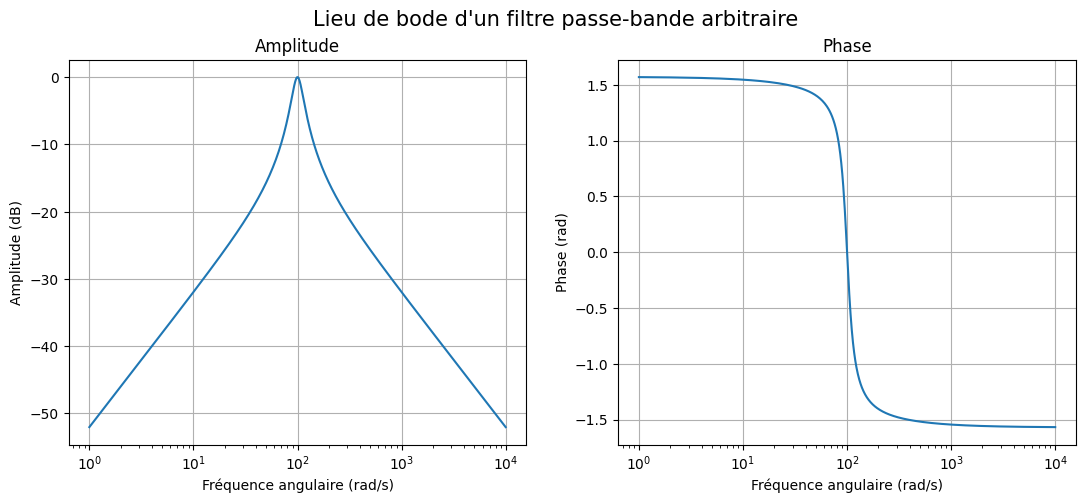

In [156]:
#Calcul de l'amplitude en dB et de la phase en degrés
Amplitude = 20*np.log10(np.abs(filtre_arbitraire))
Phase = np.angle(filtre_arbitraire)

#Affichage du graphique et de ses composantes avec une échelle semi-log en y
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(abscisse, Amplitude)
plt.semilogx()
plt.grid(True)
plt.xlabel("Fréquence angulaire (rad/s)")
plt.ylabel("Amplitude (dB)")
plt.title("Amplitude")
plt.subplot(1,2,2)
plt.plot(abscisse, Phase)
plt.semilogx()
plt.grid(True)
plt.xlabel("Fréquence angulaire (rad/s)")
plt.ylabel("Phase (rad)")
plt.title("Phase")
plt.suptitle("Lieu de bode d'un filtre passe-bande arbitraire", fontsize = 15)
plt.show()



## 3. FFT ##

Effectuez et affichez la transformée de Fourier rapide (FFT) du signal $g(t)$ défini à la question 1.

Les fonctions [np.fft.fft()](https://numpy.org/doc/stable/reference/routines.fft.html), [np.fft.fftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) et [np.fft.fftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html) vous serons utiles.

In [157]:
#Transformée de Fourier centrée sur omega0
Fg_t = np.fft.fftshift(np.fft.fft(g_t))
#Plage de fréquences
Frequency = np.fft.fftshift(np.fft.fftfreq(len(t_secondes)))

C:\Users\Justine Lejeune\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


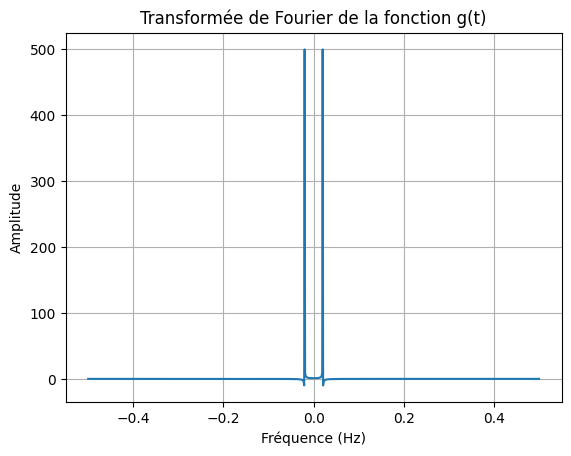

In [158]:
#Affichage de la transformée de Fourier
plt.plot(Frequency, Fg_t) #Pourquoi mettre la valeur absolue?
plt.grid(True)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.title("Transformée de Fourier de la fonction g(t)")
plt.show()


## 4 Correlation et convolution ##


Le produit de convolution est défini par
$$ f(t)* g(t) = \int f(t)g(t-\tau)d\tau$$

__4.1__ À l'aide de la fonction [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html), tracer le produit de convolution de votre signal $g(t)$ défini à la question 1 avec une fenêtre carrée. Portez particulièrement attention au paramètre "mode". On recommande la valeur "same".

[1.]


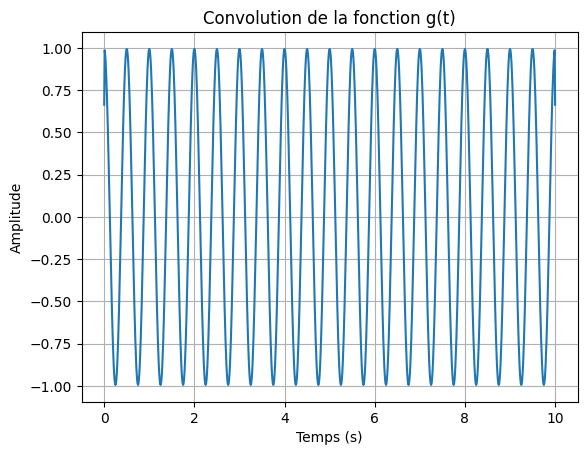

In [159]:
#Produit de convolution
convolution = np.convolve(g_t, np.ones(3)/3, mode = 'same')
print(np.ones(1))

#Affichage de la convolution
plt.plot(t_secondes, convolution)
plt.grid(True)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Convolution de la fonction g(t)")
plt.show()


L'inter-corrélation est définie de manière similaire à la convolution, à un signe et conjugué prêt:
$$ f(t)\star g(t) = \int f^*(t)g(t+\tau)d\tau$$

L'inter-corrélation d'un signal est très utile en traitement de signal. Il permet notamment de déterminer le déphasage du signal par rapport à un signal de référence.

__4.2__ En considérant $ g(t)$ de la question 1 comme étant le signal de référence, générez un signal $g_2(t)$ comportant un déphasage de $\pi / 3$. 

Calculez et tracez ensuite l'inter-corrélation de celui-ci à l'aide de la fonction [np.correlate()](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html). Portez particulièrement attention au paramètre "mode". On recommande la valeur "same".

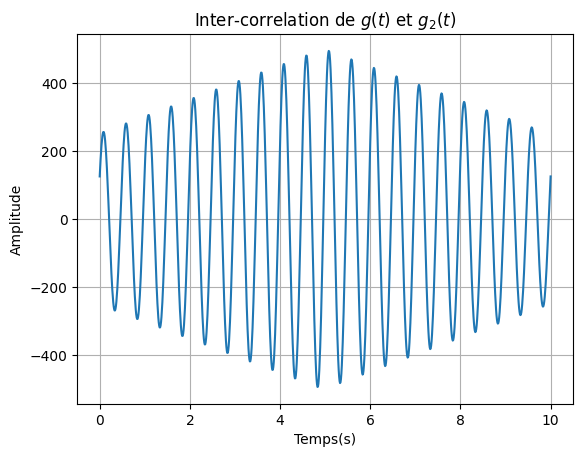

In [160]:
g_t_2 = np.cos(2*np.pi*f_0*t_secondes + np.pi/3)

correlate = np.correlate(g_t, g_t_2, mode = 'same')

#Affichage de la convolution
plt.plot(t_secondes, correlate)
plt.grid(True)
plt.xlabel("Temps(s)")
plt.ylabel("Amplitude")
plt.title("Inter-correlation de $g(t)$ et $g_2(t)$")
plt.show()

__4.3__ Le déphasage peut être calculé en déterminant le décalage de la position du maxium de l'inter-corrélation.

__Note__: On sait que le maximum de l'inter-corrélation se trouve au centre du vecteur en absence de déphasage.

À l'aide de [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), trouvez la position du maximum de l'inter-corrélation et par la suite, la valeur du déphasage. Comparez cette valeur avec la valeur réelle du déphasage.

<!-- __Note__: Portez attention à la notion d'indice d'un vecteur et la valeur de l'indice du vecteur. -->

In [163]:
t_max = t_secondes[np.argmax(correlate)]
t_milieu = t_secondes[len(t_secondes)//2] #Devrait être égal à 5 car on a un vecteur allant de 0 à 10
decalage = t_max - t_milieu #Décalage entre le maximum de l'inter-corrélation et l'origine au centre du vecteur
phase = decalage*f_0*2*np.pi

print(phase)
print(np.pi/3)

1.0053096491487348
1.0471975511965976


### Interpolation

Afin de raffiner notre approximation de la valeur du déphasage, nous aimerions avoir plus de points au voisinage du maximum de l'inter-correlation de la fonction $g(t)$. Nous allons alors utiliser la sous-librairie [interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html) de Scipy.

In [164]:
from scipy import interpolate

__4.4__ Plus particulièrement, la fonction [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) sera utilisé ici. À l'aide de cette dernière, réalisez une interpolation de type quadratique autour du maximum de l'inter-corrélation et calculez de nouveau le déphasage.

In [183]:
#Création de la fonction d'interpolation
f_interpolation = interpolate.interp1d(t_secondes, correlate, kind = "quadratic")

#Initialisation d'un vecteur temps plus fin autour de t_max
t_fin = np.arange(t_max-1,t_max+1,0.0001)

#Nouvelles valeurs des variables menant à la phase
nouveau_correlate = f_interpolation(t_fin)
nouveau_t_max = t_fin[np.argmax(nouveau_correlate)]
nouveau_decalage = nouveau_t_max-t_milieu
nouvelle_phase = nouveau_decalage*f_0*2*np.pi

print(nouvelle_phase)
print(np.pi/3)



1.0367255756552725
1.0471975511965976


## 5. Curve fitting ##

Finalement, nous allons explorer les capacités de curve fitting des librairies de calcul scientifiques de Python grâce à la fonction [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [ ]:
from scipy.optimize import curve_fit

 Documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

5.1 Cet exercice a pour but de réaliser un "fit" sur des données bruitées à partir d'un modèle prédéfini. L'objectif d'un tel exercice est de pouvoir récupérer les paramètres correspondants aux données observées. La première étape consiste à définir le modèle que l'on désire faire un "fit".


En vous servant de la documentation de curve_fit, définissez une fonction retournant le diagramme de Bode du gain en amplitude. Cette fonction doit prendre comme paramètre le gain $Q$ et la fréquence centrale $\omega_0$

In [185]:
def func(omega, Q, omega0):
    x =omega/omega0
    filtre = 1/(1+1.j*Q*(x-1/x))
    return 20*np.log10(np.abs(filtre))

__5.2__ À l'aide de cette fonction, obtenez alors deux versions du filtre : 

- La fonction $H(\omega)$ de base.

- La fonction $H(\omega)$ parasité par du bruit.

__Astuce__: servez-vous de la fonction [np.random.randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). La fonction [np.logspace()](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace) pourra vous être utile également.

C:\Users\Justine Lejeune\AppData\Local\Temp\ipykernel_20284\1569768373.py:3: RuntimeWarning: divide by zero encountered in divide
  filtre = 1/(1+1.j*Q*(x-1/x))
C:\Users\Justine Lejeune\AppData\Local\Temp\ipykernel_20284\1569768373.py:3: RuntimeWarning: invalid value encountered in multiply
  filtre = 1/(1+1.j*Q*(x-1/x))
C:\Users\Justine Lejeune\AppData\Local\Temp\ipykernel_20284\1569768373.py:3: RuntimeWarning: invalid value encountered in divide
  filtre = 1/(1+1.j*Q*(x-1/x))


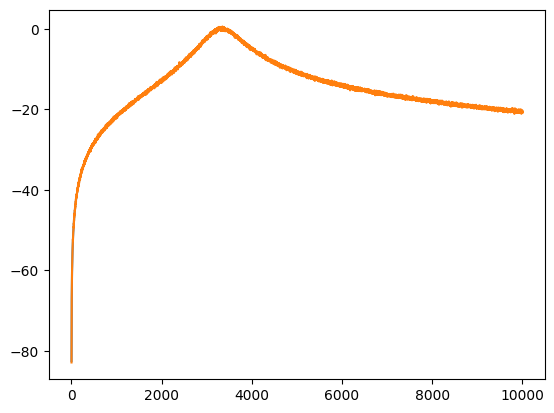

In [186]:
Omega = np.linspace(0,10000,10001)
bode = func(Omega,4,10000/3)
bode_bruit=bode+0.2*np.random.randn(len(bode))


__5.3__ À l'aide de la fonction <code>curve_fit</code>, réalisez un fit de vos données simulées à partir de votre modèle. Afficher un graphe comparatif complet. Vous aurez possiblement besoin de réaliser des ajustements pour obtenir un fit adéquat. Lisez la documentation et portez notamment attention au paramètre "bounds".

In [ ]:
#solution


In [ ]:
# solution



## 6. Meshgrid ##

À l'aide de la fonction  [np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), calculez la fonction Gaussienne en 2D.

In [ ]:
# solution

À l'aide la fonction [plt.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), tracez maintenant la Gaussienne 2D. Définissez vos axes.